# Prediciting heart disease using classification model

In [1]:
#LIBRARIES REQUIRED
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#MODELS FROM SKLEARN
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#MODEL EVALUATIONS
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

## Load Data

In [2]:
df =pd.read_csv('heart-disease.csv')
df.shape

(303, 14)

## **Data exploration (exploratory data analysis or EDA)**


In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


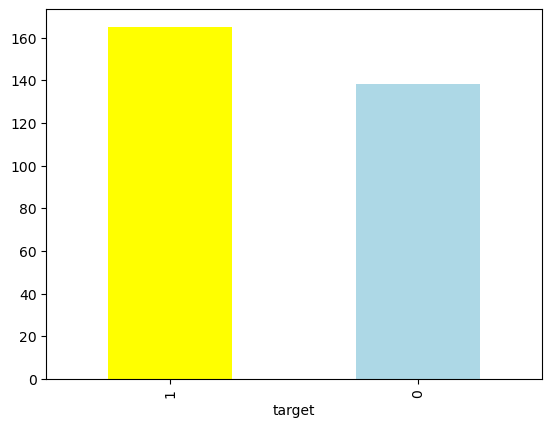

In [4]:
df ['target'].value_counts().plot(kind='bar',color=['yellow','lightblue'])
plt.show()

In [5]:
#different types of data we have 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
 #to see what is missing in our data
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### heart disease frequency according to sex 

In [8]:
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [9]:
# Compare target column with sex column
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


0 is women, 1 is male
0 is no disease, 1 has disease
There are a total approx 100 women and 72 out of them has heartdisease. So what we infer is 75% chances are there for women to get heart disease. And if it is male then approx 50% has heart disease.
In general around 62.5% chance of participant has heart disease.


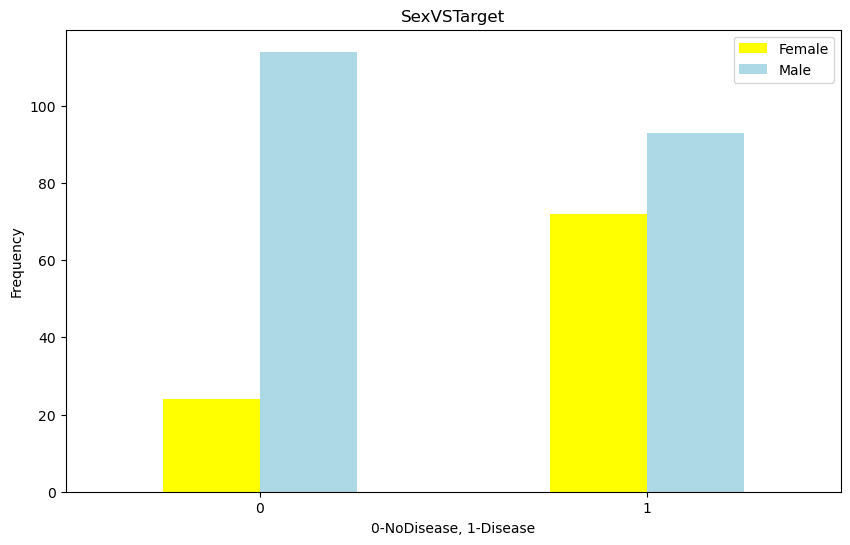

In [10]:
pd.crosstab(df.target,df.sex).plot(kind='bar',figsize=(10,6),
                                  color=['yellow','lightblue']) 
plt.ylabel('Frequency')
plt.xlabel('0-NoDisease, 1-Disease')
plt.title('SexVSTarget')
plt.legend(['Female','Male'])
plt.xticks(rotation=0)
plt.show();

### age vs max heart rate 

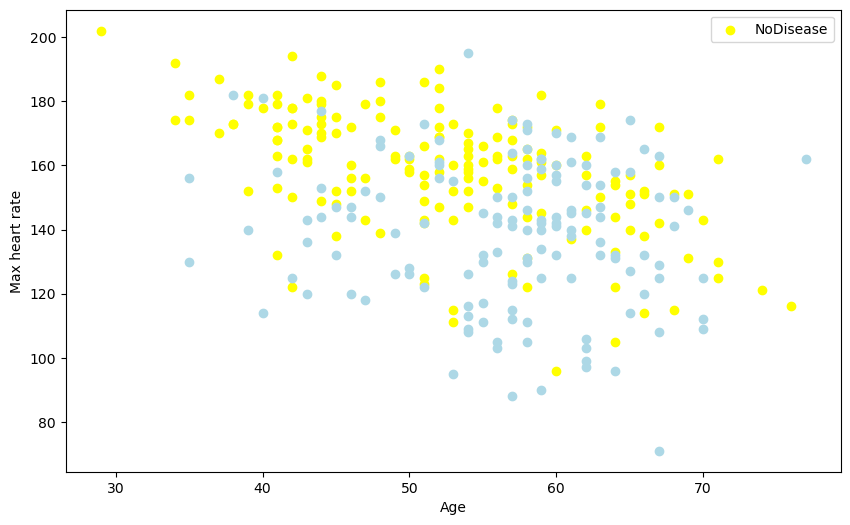

In [11]:
plt.figure(figsize=(10,6))

#with heart disease
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c='yellow')

plt.xlabel('Age')
plt.ylabel('Max heart rate')
plt.legend(['NoDisease','Disease']);

#without heart disease
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c='lightblue')
plt.show();

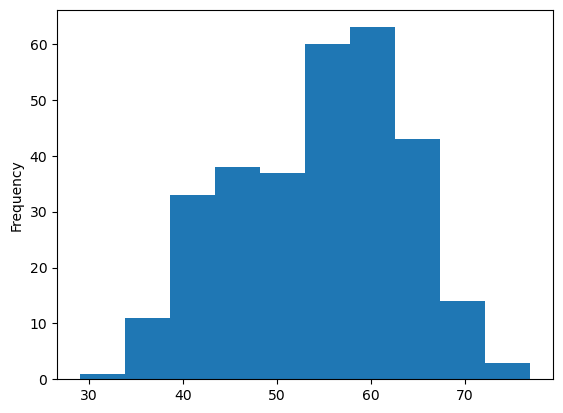

In [12]:
#Lets understand the spread of age
df.age.plot.hist()
plt.show();

### Heart disease frequency per chest pain type
 0-typical angina, 
 1-atypical angina, 
 2-non-anginal, 
 3-asymptomatic

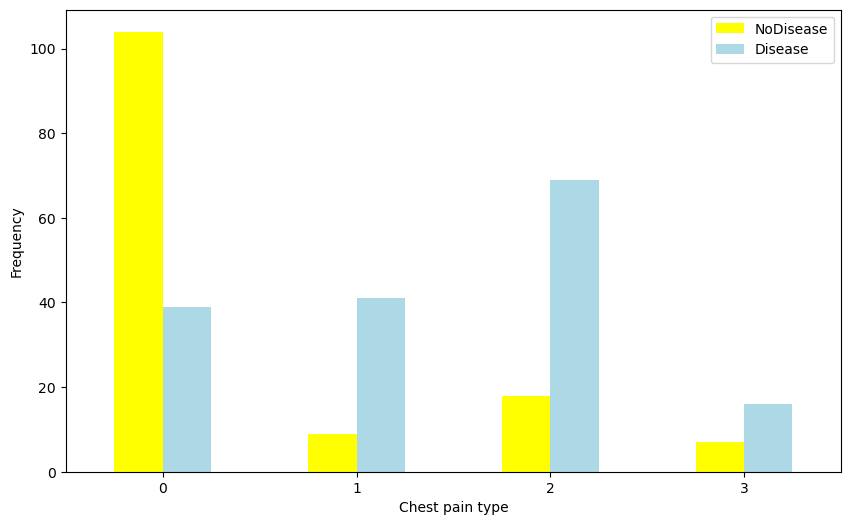

In [13]:
pd.crosstab(df.cp,df.target).plot(kind='bar',
                                  figsize=(10,6),
                                  color=['yellow','lightblue'])
plt.xlabel('Chest pain type')
plt.ylabel('Frequency')
plt.legend(['NoDisease','Disease'])
plt.xticks(rotation=0)
plt.show();

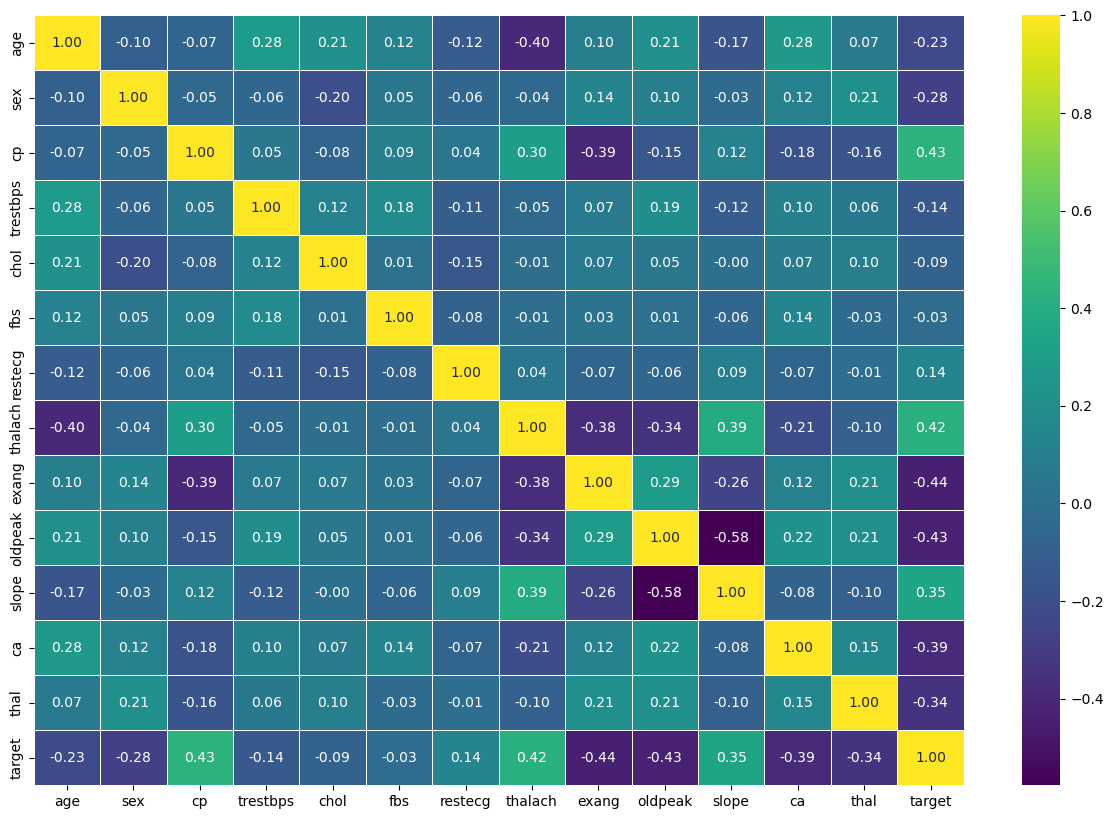

In [14]:
#make correlation matrix
corr_mat= df.corr()
fig,ax= plt.subplots(figsize=(15,10))
ax= sns.heatmap(corr_mat,annot=True,
                linewidths=0.5,fmt='.2f',
                cmap='viridis')
plt.show();

### Modelling 

In [15]:
#split data
X= df.drop('target',axis=1)
y=df['target']

np.random.seed(18)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [16]:
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
34,51,1,3,125,213,0,0,125,1,1.4,2,1,2
17,66,0,3,150,226,0,1,114,0,2.6,0,0,2
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2
57,45,1,0,115,260,0,0,185,0,0.0,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2


In [17]:
len(y_train),len(y_test)

(242, 61)

In [18]:
# PUT MODELS IN DICTIONARY
models={'Logistic Regression': LogisticRegression(),
      'KNN':KNeighborsClassifier(),
      'Random Forest': RandomForestClassifier()}

def fit_and_score(models,X_train,X_test,y_train,y_test):
    '''Fits and evaluates given ML models'''
    
    np.random.seed(18)
    model_scores = {}

    for name, model in models.items():
        model.fit(X_train,y_train)
        model_scores[name] = model.score(X_test,y_test)

    return model_scores

In [19]:
model_scores = fit_and_score(models=models,
                            X_train=X_train,
                            X_test=X_test,
                            y_train=y_train,
                            y_test=y_test)

model_scores

C:\Users\USER\Desktop\classification-project\env\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8360655737704918,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8524590163934426}

## Model Comparison

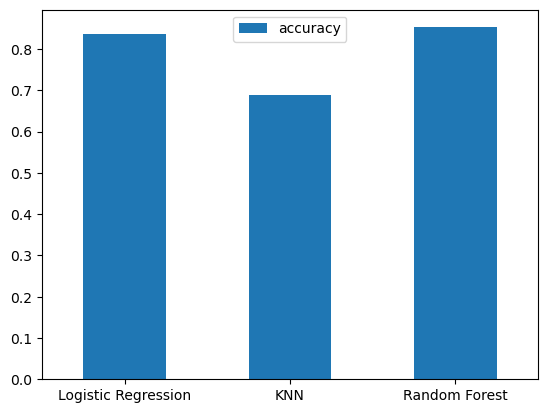

In [20]:
model_compare =pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot.bar()
plt.xticks(rotation=0)
plt.show();

### Hyperparameter tuning

In [21]:
# 1. Tuning of KNN

train_score = []
test_score =[]

neighbors = range(1,21)
knn=KNeighborsClassifier()

for i in neighbors:
    knn.set_params(n_neighbors=i)
    knn.fit(X_train,y_train)
    train_score.append(knn.score(X_train,y_train))
    test_score.append(knn.score(X_test,y_test))

In [22]:
train_score

[1.0,
 0.7933884297520661,
 0.7603305785123967,
 0.768595041322314,
 0.7603305785123967,
 0.7355371900826446,
 0.731404958677686,
 0.7107438016528925,
 0.7107438016528925,
 0.7107438016528925,
 0.6900826446280992,
 0.6983471074380165,
 0.6859504132231405,
 0.6900826446280992,
 0.6859504132231405,
 0.6859504132231405,
 0.6859504132231405,
 0.6859504132231405,
 0.6859504132231405,
 0.6735537190082644]

In [23]:
test_score

[0.5245901639344263,
 0.47540983606557374,
 0.6721311475409836,
 0.6065573770491803,
 0.6885245901639344,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.7377049180327869,
 0.7049180327868853,
 0.7540983606557377,
 0.6885245901639344,
 0.7049180327868853,
 0.6885245901639344,
 0.7049180327868853,
 0.7377049180327869,
 0.7377049180327869,
 0.7213114754098361,
 0.7377049180327869,
 0.7377049180327869]

Max KNN score on test is:75.41%


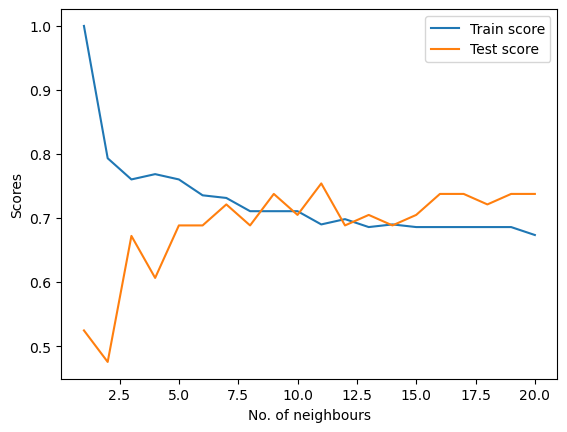

In [24]:
plt.plot(neighbors,train_score,label='Train score')
plt.plot(neighbors,test_score,label='Test score')
plt.xlabel('No. of neighbours')
plt.ylabel('Scores')
plt.legend()
print(f'Max KNN score on test is:{max(test_score)*100:.2f}%')
plt.show();

### Tuning with RandomizedSearchCV

In [25]:
# Hyperparameters for LogisticRegression n RandomForestClassifer

log_reg_grid ={'C': np.logspace(-4,4,20),
              'solver':['liblinear']}

rf_grid = {'n_estimators':np.arange(10,1000,50),
          'max_depth':[None,3,5,10],
          'min_samples_split': np.arange(2,20,2),
          'min_samples_leaf': np.arange(1,20,2)}

Hyperarameter grid is formed for both models

In [26]:
# 2. Tuning LogisticRegression

np.random.seed(18)
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions=log_reg_grid,
                               cv=5,n_iter=20,verbose=True)
rs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


,estimator,LogisticRegression()
,param_distributions,"{'C': array([1.0000...00000000e+04]), 'solver': ['liblinear']}"
,n_iter,20
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,True
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [27]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': np.float64(0.23357214690901212)}

In [28]:
rs_log_reg.score(X_test,y_test)

0.819672131147541

In [29]:
# 3. Tuning of RandomForestClassifier

np.random.seed(18)
rs_rf=RandomizedSearchCV(RandomForestClassifier(),
                        param_distributions=rf_grid,
                        cv=5,n_iter=20,verbose=True)

rs_rf.fit(X_train,y_train) 

Fitting 5 folds for each of 20 candidates, totalling 100 fits


,estimator,RandomForestClassifier()
,param_distributions,"{'max_depth': [None, 3, ...], 'min_samples_leaf': array([ 1, 3..., 15, 17, 19]), 'min_samples_split': array([ 2, 4..., 14, 16, 18]), 'n_estimators': array([ 10, ...60, 910, 960])}"
,n_iter,20
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,True
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [30]:
rs_rf.best_params_

{'n_estimators': np.int64(610),
 'min_samples_split': np.int64(16),
 'min_samples_leaf': np.int64(5),
 'max_depth': 3}

In [31]:
rs_rf.score(X_test,y_test)

0.8688524590163934

### Tuning hyperparameter with GridSearchCV

In [32]:
# Hyperparameter for our model - LogisticRegression

log_reg_grid ={'C': np.logspace(-4,4,30),
              'solver':['liblinear']}

gs_log_reg = GridSearchCV(LogisticRegression(),
                               param_grid=log_reg_grid,
                               cv=5,verbose=True)
gs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


,estimator,LogisticRegression()
,param_grid,"{'C': array([1.0000...00000000e+04]), 'solver': ['liblinear']}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,True
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l2'


In [33]:
gs_log_reg.best_params_

{'C': np.float64(0.20433597178569418), 'solver': 'liblinear'}

In [34]:
gs_log_reg.score(X_test,y_test)

0.8360655737704918

In [35]:
# Make predicitons with tuned model
y_preds = gs_log_reg.predict(X_test)
y_preds

array([1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1])

In [36]:
y_test

199    0
192    0
246    0
257    0
268    0
      ..
50     1
252    0
161    1
203    0
39     1
Name: target, Length: 61, dtype: int64

### Evaluating beyond accuracy

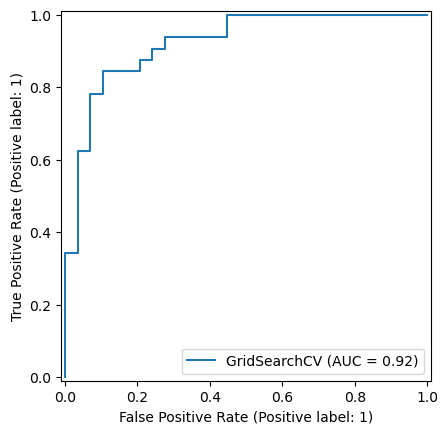

In [37]:
# ROC curve
RocCurveDisplay.from_estimator(gs_log_reg,X_test,y_test)
plt.show();

In [38]:
# Confusion matrix
print(confusion_matrix(y_test,y_preds))

[[21  8]
 [ 2 30]]


<Figure size 640x480 with 0 Axes>

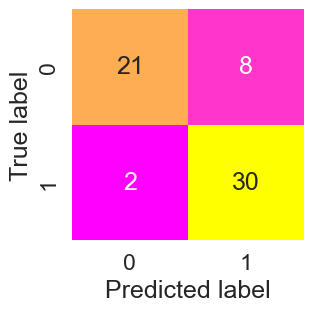

In [39]:
# Make it more colourful

sns.set(font_scale=1.5)

def plot_conf_mat(y_test,y_preds):
    ''' Plots colourful matrix'''
    plt.figure();
    fig,ax = plt.subplots(figsize=(3,3))
    ax=sns.heatmap(confusion_matrix(y_test,y_preds),
                    annot=True,cbar=False,cmap='spring')
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
  
plot_conf_mat(y_test,y_preds)
plt.show();

In [40]:
# Classification report
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.91      0.72      0.81        29
           1       0.79      0.94      0.86        32

    accuracy                           0.84        61
   macro avg       0.85      0.83      0.83        61
weighted avg       0.85      0.84      0.83        61



In [41]:
gs_log_reg.best_params_

{'C': np.float64(0.20433597178569418), 'solver': 'liblinear'}

In [42]:
clf = LogisticRegression(C=0.20433597178569418,
                        solver='liblinear')

### Evaluation with Cross-validation scoring method

In [43]:
#cross_val - accuracy
cv_acc=cross_val_score(clf,X,y,
                      cv=5,scoring='accuracy')
cv_acc

array([0.81967213, 0.90163934, 0.86885246, 0.88333333, 0.75      ])

In [44]:
cv_acc = np.mean(cv_acc)
cv_acc

np.float64(0.8446994535519124)

In [45]:
#cross_val - precision
cv_pre=cross_val_score(clf,X,y,
                      cv=5,scoring='precision')
cv_pre

array([0.775     , 0.88571429, 0.85714286, 0.86111111, 0.725     ])

In [46]:
cv_pre=np.mean(cv_pre)
cv_pre

np.float64(0.8207936507936507)

In [47]:
#cross_recall
cv_recall=cross_val_score(clf,X,y,
                      cv=5,scoring='recall')
cv_recall

array([0.93939394, 0.93939394, 0.90909091, 0.93939394, 0.87878788])

In [48]:
cv_recall=np.mean(cv_recall)
cv_recall

np.float64(0.9212121212121213)

In [49]:
#cross_val - f1 score
cv_f1=cross_val_score(clf,X,y,
                      cv=5,scoring='f1')
cv_f1

array([0.84931507, 0.91176471, 0.88235294, 0.89855072, 0.79452055])

In [50]:
cv_f1 = np.mean(cv_f1)
cv_f1

np.float64(0.8673007976269721)

<Figure size 640x480 with 0 Axes>

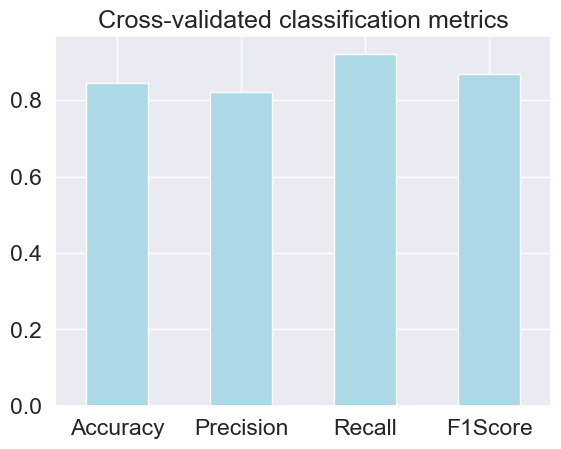

In [51]:
#Visualize cross_val metrics
plt.figure();
cv_metrics =pd.DataFrame({'Accuracy':cv_acc,
                         'Precision':cv_pre,
                         'Recall':cv_recall,
                         'F1Score':cv_f1},index=[0])
cv_metrics.T.plot.bar(title='Cross-validated classification metrics',legend=False,color='lightblue')
plt.xticks(rotation=0)
plt.show();

### Feature importance

In [52]:
clf = LogisticRegression(C=0.20433597178569418,
                        solver='liblinear')
clf.fit(X_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,0.20433597178569418
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'liblinear'
,max_iter,100
,multi_class,'deprecated'


In [53]:
clf.coef_

array([[ 0.01684294, -0.90003619,  0.74487631, -0.01901002, -0.00256095,
        -0.06502769,  0.16858893,  0.0304437 , -0.54259852, -0.38637088,
         0.30829134, -0.61990508, -0.80599693]])

In [54]:
feature_dict = dict(zip(df.columns,
                         list(clf.coef_[0])))
feature_dict

{'age': np.float64(0.016842944046961426),
 'sex': np.float64(-0.9000361949946601),
 'cp': np.float64(0.7448763069653376),
 'trestbps': np.float64(-0.01901001797171419),
 'chol': np.float64(-0.002560953195495222),
 'fbs': np.float64(-0.06502769147582707),
 'restecg': np.float64(0.16858892668956318),
 'thalach': np.float64(0.030443698947768053),
 'exang': np.float64(-0.542598515609168),
 'oldpeak': np.float64(-0.3863708816330882),
 'slope': np.float64(0.3082913435720714),
 'ca': np.float64(-0.6199050801352932),
 'thal': np.float64(-0.8059969330785868)}

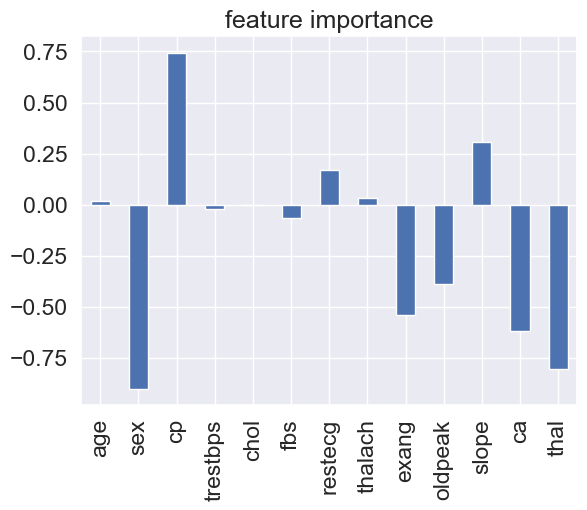

In [56]:
# Visualize feature importance
feature_df = pd.DataFrame (feature_dict,index=[0])
feature_df.T.plot.bar(title='feature importance',legend=False)
plt.show();

How to improve further?
 * could we get more data
 * try better model? CatBoost or XGBoost?
 * improve current model(maybe random forest)
 * n so on.....
 * Try new data to practice

### Saving and exporting